In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [13]:
df=pd.read_csv(r'../input/hotel-booking-cancellation/Python_Project_09_Random_Forest_Classification_Prospect_Hotel_Booking_Cancellation.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [15]:
for i in df.columns:
    print(i,df[i].unique())

hotel ['Resort Hotel' 'City Hotel']
is_canceled [0 1]
lead_time [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194

In [16]:
df['agent']=df['agent'].replace(np.nan,df['agent'].mean())
df['country']=df['country'].replace(np.nan,'other')
df['company'] = df['company'].replace(np.nan, df['company'].mean())

In [17]:
df=df.dropna()

In [18]:
df = df.drop('reservation_status_date' , axis = 1 )   

<AxesSubplot:>

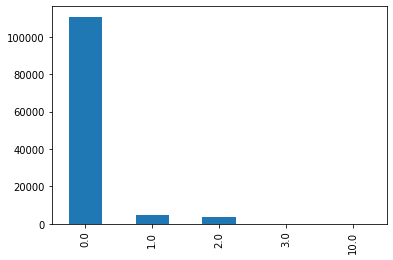

In [19]:
df['children'].value_counts().plot(kind='bar')

<AxesSubplot:>

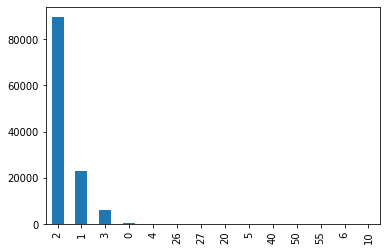

In [20]:
df['adults'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

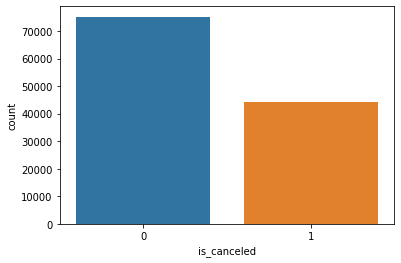

In [21]:
sns.countplot("is_canceled",data=df)

In [22]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['hotel']=enc.fit_transform(df['hotel'])
df['country'] = enc.fit_transform(df['country'])
df['hotel'] = enc.fit_transform(df['hotel'])
df['market_segment'] = enc.fit_transform(df['market_segment'])
df['distribution_channel'] = enc.fit_transform(df['distribution_channel'])
df['meal'] = enc.fit_transform(df['meal'])
df['reserved_room_type'] = enc.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = enc.fit_transform(df['assigned_room_type'])
df['deposit_type'] = enc.fit_transform(df['deposit_type'])
df['customer_type'] = enc.fit_transform(df['customer_type'])
df['reservation_status'] = enc.fit_transform(df['reservation_status'])
df['arrival_date_month'] = enc.fit_transform(df['arrival_date_month'])

In [23]:
X=df.drop('is_canceled',axis=1)
y=df['is_canceled']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=10)
X_train.shape,X_test.shape

((83570, 30), (35816, 30))

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',n_estimators=100,max_depth=8,min_samples_split=5,min_samples_leaf=1,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=5, random_state=42)

In [25]:
print("Training Score:",rf.score(X_train,y_train))
print("Testing Score:",rf.score(X_test,y_test))

Training Score: 0.9944358023214072
Testing Score: 0.9938854143399598


In [26]:
y_pred=rf.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [27]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report
accuracy_score(y_test, y_pred)

0.9938854143399598

In [28]:
con_mat=confusion_matrix(y_test, y_pred)
con_mat

array([[22525,     0],
       [  219, 13072]])

In [29]:
print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.9904    1.0000    0.9952     22525
           1     1.0000    0.9835    0.9917     13291

    accuracy                         0.9939     35816
   macro avg     0.9952    0.9918    0.9934     35816
weighted avg     0.9939    0.9939    0.9939     35816

